<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/states/daily"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/04-22-2020.csv"

#https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/
#csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv
dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [6]:
dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(),\
  ['state', 'positive', 'negative', 'totalTestResults']].sort_values(by='positive', ascending=False).head(10)

,state,positive,negative,totalTestResults
37,NY,257216,412766,669982.0
34,NJ,95865,95794,191659.0
21,MA,42944,137518,180462.0
5,CA,35396,429931,465327.0
16,IL,35108,129238,164346.0
41,PA,35045,136272,171317.0
24,MI,33966,84259,118225.0
10,FL,28309,260318,288627.0
20,LA,25258,117576,142834.0
7,CT,22469,47449,69918.0


In [0]:
gbUSA = dfCovidtracking.groupby(['date'])
gbCA = dfCovidtracking[dfCovidtracking.state=='CA'].groupby(['date'])

dfUSAPos = gbUSA[['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']].sum().reset_index().copy()
dfCAPos = gbCA[['positive', 'totalTestResults', 'death','positiveIncrease', 'deathIncrease']].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 
dfUSAPos['PCT']= dfUSAPos.positive/dfUSAPos.max().positive
dfCAPos['PCT']=dfCAPos.positive/dfCAPos.max().positive

In [68]:
dfUSAPos[-8:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,PCT
47,2020-04-15,632656,3242755.0,28160,30183.0,2492.0,0.765060
48,2020-04-16,663260,3401064.0,30296,30604.0,2136.0,0.802069
49,2020-04-17,694520,3557493.0,32365,31260.0,2069.0,0.839872
50,2020-04-18,722182,3698534.0,34139,27662.0,1774.0,0.873323
51,2020-04-19,749203,3865864.0,35793,27021.0,1654.0,0.905999
52,2020-04-20,772524,4003551.0,37321,23321.0,1528.0,0.934200
53,2020-04-21,799717,4155178.0,39995,27193.0,2674.0,0.967085
54,2020-04-22,826936,4466559.0,42103,27219.0,2108.0,1.000000


In [69]:
dfCAPos[-7:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,PCT
42,2020-04-16,3321,28451.0,137,110.0,6.0,0.813771
43,2020-04-17,3524,29762.0,142,203.0,5.0,0.863514
44,2020-04-18,3626,30751.0,151,102.0,9.0,0.888508
45,2020-04-19,3728,31598.0,155,102.0,4.0,0.913502
46,2020-04-20,3830,32347.0,158,102.0,3.0,0.938495
47,2020-04-21,3937,33055.0,163,107.0,5.0,0.964715
48,2020-04-22,4081,33888.0,172,144.0,9.0,1.000000


In [10]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-04-18,722182,2976352,9906,56575.0,78839.0,14788.0,2096.0,5729.0,205.0,51390.0,34139,78839.0,3708440,3698534.0,3698534.0,1774.0,3224.0,113379.0,27662.0,141041.0
2020-04-19,749203,3116661,11324,55565.0,80881.0,14548.0,2145.0,5603.0,214.0,53630.0,35793,80881.0,3877188,3865864.0,3865864.0,1654.0,2042.0,140309.0,27021.0,167330.0
2020-04-20,772524,3231027,4037,55509.0,82879.0,14691.0,2193.0,5567.0,214.0,54438.0,37321,82879.0,4007588,4003551.0,4003551.0,1528.0,1998.0,114366.0,23321.0,137687.0
2020-04-21,799717,3355461,3956,58468.0,84292.0,15228.0,2315.0,5514.0,214.0,58117.0,39995,84292.0,4159134,4155178.0,4155178.0,2674.0,1413.0,124434.0,27193.0,151627.0
2020-04-22,826936,3639623,4191,58173.0,85465.0,15341.0,2370.0,5474.0,227.0,61519.0,42103,85465.0,4470750,4466559.0,4466559.0,2108.0,1173.0,284162.0,27219.0,311381.0


In [11]:
gbCA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-04-18,28963,230703,7200,4936.0,0.0,1490.0,0.0,0.0,0.0,0.0,1072,0.0,266866,259666.0,259666.0,87.0,0.0,6617.0,1435.0,8052.0
2020-04-19,30333,250567,7200,4731.0,0.0,1457.0,0.0,0.0,0.0,0.0,1166,0.0,288100,280900.0,280900.0,94.0,0.0,19864.0,1370.0,21234.0
2020-04-20,30978,259522,0,4674.0,0.0,1480.0,0.0,0.0,0.0,0.0,1208,0.0,290500,290500.0,290500.0,42.0,0.0,8955.0,645.0,9600.0
2020-04-21,33261,266839,0,4886.0,0.0,1502.0,0.0,0.0,0.0,0.0,1268,0.0,300100,300100.0,300100.0,60.0,0.0,7317.0,2283.0,9600.0
2020-04-22,35396,429931,0,4984.0,0.0,1551.0,0.0,0.0,0.0,0.0,1354,0.0,465327,465327.0,465327.0,86.0,0.0,163092.0,2135.0,165227.0


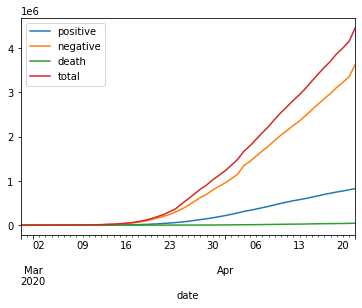

In [12]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

In [13]:
dfWHO[-14:]

,confirmed,who_deaths
date,,
2020-04-09,395939,12740
2020-04-10,425889,14665
2020-04-11,461275,16596
2020-04-12,492881,18516
2020-04-13,524514,20444
2020-04-14,553822,21972
2020-04-15,578268,23476
2020-04-16,604070,25871
2020-04-17,632781,28221


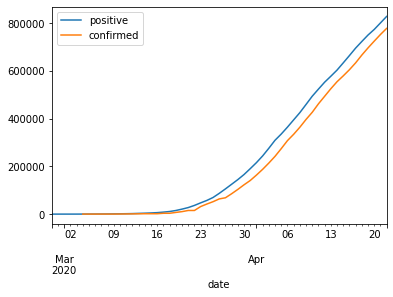

In [14]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

In [15]:
gbCA.sum()[-7:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-04-16,26182,220218,13200,5031.0,0.0,1568.0,0.0,0.0,0.0,0.0,890,0.0,259600,246400.0,246400.0,69.0,0.0,28156.0,1758.0,29914.0
2020-04-17,27528,224086,7200,4892.0,0.0,1484.0,0.0,0.0,0.0,0.0,985,0.0,258814,251614.0,251614.0,95.0,0.0,3868.0,1346.0,5214.0
2020-04-18,28963,230703,7200,4936.0,0.0,1490.0,0.0,0.0,0.0,0.0,1072,0.0,266866,259666.0,259666.0,87.0,0.0,6617.0,1435.0,8052.0
2020-04-19,30333,250567,7200,4731.0,0.0,1457.0,0.0,0.0,0.0,0.0,1166,0.0,288100,280900.0,280900.0,94.0,0.0,19864.0,1370.0,21234.0
2020-04-20,30978,259522,0,4674.0,0.0,1480.0,0.0,0.0,0.0,0.0,1208,0.0,290500,290500.0,290500.0,42.0,0.0,8955.0,645.0,9600.0
2020-04-21,33261,266839,0,4886.0,0.0,1502.0,0.0,0.0,0.0,0.0,1268,0.0,300100,300100.0,300100.0,60.0,0.0,7317.0,2283.0,9600.0
2020-04-22,35396,429931,0,4984.0,0.0,1551.0,0.0,0.0,0.0,0.0,1354,0.0,465327,465327.0,465327.0,86.0,0.0,163092.0,2135.0,165227.0


In [16]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    839675
dead          46583
dtype: int64

In [17]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    37344
dead          1421
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [19]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                839675
Spain             208389
Italy             187327
France            157125
Germany           150648
United Kingdom    134638
Turkey             98674
Iran               85996
China              83868
Russia             57999
Name: confirmed, dtype: int64

In [0]:
dfData = dfCovidtracking.groupby('date')

In [0]:
dfStateTotal = dfCovidtracking[['state', 'positive']].groupby(by='state').max() \
.rename(columns={'positive':'current_total'})


In [0]:
dfState = dfCovidtracking[['date','state','positive', 'death']].set_index('state') \
  .join(dfStateTotal)

In [0]:
dfState['pct']=dfState.positive/dfState.current_total

In [60]:
dfState.loc['FL'].head(7)

,date,positive,death,current_total,pct
state,,,,,
FL,2020-04-22,28309,910,28309,1.000000
FL,2020-04-21,27495,856,28309,0.971246
FL,2020-04-20,26660,806,28309,0.941750
FL,2020-04-19,25996,781,28309,0.918295
FL,2020-04-18,25269,754,28309,0.892614
FL,2020-04-17,24119,699,28309,0.851991
FL,2020-04-16,22897,646,28309,0.808824


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

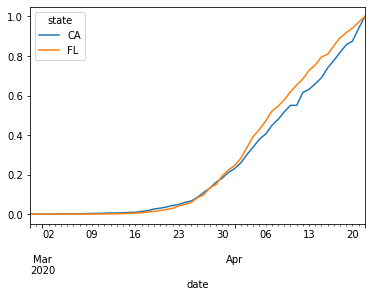

In [26]:
x = res.loc[:, ['CA','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

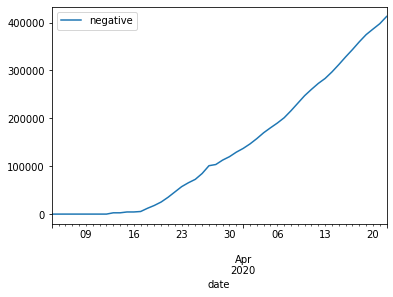

In [28]:
x = dfNYTesting.plot.line()

In [29]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['FL']))].head(10)

,state,date,positive,current_total,pct
474,FL,2020-04-22,28309,28309,1.000000
475,FL,2020-04-21,27495,28309,0.971246
476,FL,2020-04-20,26660,28309,0.941750
477,FL,2020-04-19,25996,28309,0.918295
478,FL,2020-04-18,25269,28309,0.892614
479,FL,2020-04-17,24119,28309,0.851991
480,FL,2020-04-16,22897,28309,0.808824
481,FL,2020-04-15,22511,28309,0.795189
482,FL,2020-04-14,21367,28309,0.754778
483,FL,2020-04-13,20601,28309,0.727719


In [30]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=3)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .7)].sort_values(by='pct')


,state,date,positive,current_total,pct


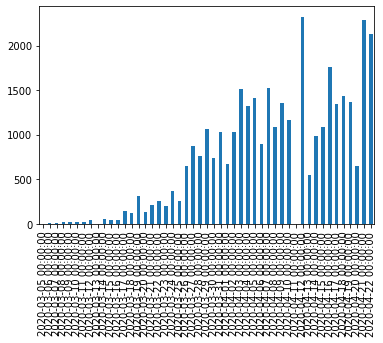

In [31]:
state = 'CA'
dfState = dfCovidtracking[dfCovidtracking.state==state].sort_values(by='date')
vals = dfState.positive.values

x=pd.Series([y-x for x,y in zip(vals,vals[1:])], \
          index = dfCovidtracking[dfCovidtracking.state==state]\
          .sort_values(by='date').date.values[1:] ) \
          .plot.bar()



# Added State Data

In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [62]:
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending','death', 'total']].sum()
print(res)
print(f"Current Infection Rate {res.positive/res.total*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")

positive     826936
negative    3639623
pending        4191
death         42103
total       4470750
dtype: int64
Current Infection Rate 18.496583%
Percentage of US affected: 0.264758%
Percentage of US tested/affected: 1.373589%


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [66]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.322205,3.444007
NJ,1.079295,2.157790
CT,0.630216,1.961076
MA,0.623054,2.618236
RI,0.551370,3.938412
LA,0.543324,3.072496
DC,0.454269,2.196532
MI,0.340107,1.183806
DE,0.328622,1.699899


In [43]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 1.360762%
